In [1]:
import pandas as pd 
from google.cloud import storage
import io
import os

from datetime import datetime


In [2]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/home/lulu/projects/data_talks/nyc-collisions/terraform-mage-gcp/nyc-auto-accidents-terraform.json


In [11]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/lulu/gcp-keys/nyc-collisions-gcp.json"
!echo $GOOGLE_APPLICATION_CREDENTIALS

/home/lulu/gcp-keys/nyc-collisions-gcp.json


In [13]:
full_data = pd.DataFrame()

# Create a client to interact with the GCS service
client = storage.Client()

data_files = ['collisions_batch_0.parquet', 'collisions_batch_1.parquet', 'collisions_batch_2.parquet']
# Define your GCS bucket name and file name
bucket_name = 'collisions-first-try'
for data_file in data_files:
    file_name = data_file

    # Get the bucket containing the file
    bucket = client.get_bucket(bucket_name)

    # Get the blob (file) from the bucket
    blob = bucket.blob(file_name)

    # Download the file contents as a string
    file_contents = blob.download_as_string()
    
    new_df = pd.read_parquet(io.BytesIO(file_contents))
    
    full_data = pd.concat([full_data, new_df])


In [14]:
full_data.head()

,collision_id,crash_date,crash_time,zip_code,borough,latitude,longitude,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,crash_datetime
0,4455765.0,2021-09-11,02:39,NaN,None,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,None,...,Unspecified,None,None,None,Sedan,Sedan,None,None,None,2021-09-11 02:39:00
1,4513547.0,2022-03-26,11:45,NaN,None,NaN,NaN,QUEENSBORO BRIDGE UPPER,None,None,...,None,None,None,None,Sedan,None,None,None,None,2022-03-26 11:45:00
2,4541903.0,2022-06-29,06:55,NaN,None,NaN,NaN,THROGS NECK BRIDGE,None,None,...,Unspecified,None,None,None,Sedan,Pick-up Truck,None,None,None,2022-06-29 06:55:00
3,4456314.0,2021-09-11,09:35,11208.0,BROOKLYN,40.667202,-73.866500,None,None,1211 LORING AVENUE,...,None,None,None,None,Sedan,None,None,None,None,2021-09-11 09:35:00
4,4486609.0,2021-12-14,08:13,11233.0,BROOKLYN,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,None,...,None,None,None,None,None,None,None,None,None,2021-12-14 08:13:00


In [15]:
full_data.describe()

,collision_id,zip_code,latitude,longitude,number_of_persons_injured,number_of_pedestrians_injured,number_of_cyclist_injured,number_of_motorist_injured,number_of_persons_killed,number_of_pedestrians_killed,number_of_cyclist_killed,number_of_motorist_killed,crash_datetime
count,5.990000e+02,388.000000,556.000000,556.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.0,599.0,599
mean,4.461590e+06,10878.569588,40.354693,-73.257096,0.452421,0.076795,0.040067,0.323873,0.005008,0.005008,0.0,0.0,2021-09-23 12:22:17.629382
min,4.136992e+06,10001.000000,0.000000,-74.200980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2019-05-21 22:50:00
25%,4.432088e+06,10456.000000,40.659301,-73.968002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2021-05-21 18:57:30
50%,4.456672e+06,11207.000000,40.704300,-73.924477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2021-09-11 07:33:00
75%,4.486947e+06,11236.000000,40.788227,-73.871271,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2021-12-14 16:57:30
max,4.545699e+06,11692.000000,40.904600,0.000000,7.000000,2.000000,1.000000,7.000000,1.000000,1.000000,0.0,0.0,2022-07-12 17:50:00
std,4.110319e+04,528.467310,3.848582,6.985267,0.782751,0.272691,0.196280,0.761938,0.070651,0.070651,0.0,0.0,NaN


In [17]:
full_data.duplicated().sum()

0

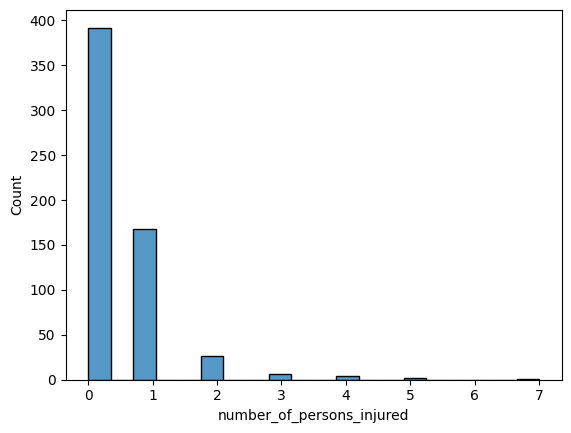

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Histogram of a numerical column
sns.histplot(full_data['number_of_persons_injured'], bins=20)
plt.show()